In [0]:
from zipfile import ZipFile

from PIL import Image, ImageDraw
import pytesseract
import cv2 as cv
import numpy as np

# load classifier
classifier_path = 'C:\\Users\\smouz\\Google Drive\\jupyter_notebook\\coursera\\haarcascade_frontalface_default.xml'
face_cascade = cv.CascadeClassifier(classifier_path)


In [0]:
# extract files using context manager
zipfile = 'small_img.zip'
small_file_list = 0
with ZipFile(zipfile, 'r') as zp:
    print('Extracting files...')
    zp.printdir()
    zp.extractall()
    small_file_list = zp.namelist()
    print('Completed!')

Extracting files...
File Name                                             Modified             Size
a-0.png                                        2019-02-26 22:30:30     21000053
a-1.png                                        2019-02-26 22:30:28     22598429
a-2.png                                        2019-02-26 22:30:28      3650049
a-3.png                                        2019-02-26 22:30:30     18646538
Completed!


In [0]:
# draw rectangles around faces
def draw_face_rect(faces_matrix, draw_on, return_box = False):
    """
    Displays rectangles around faces or returns boxes around faces.
    Returns list of tuples which contain coordinates of rectangles.
    List of tuples is in format (x1,y1,x2,y2).
    """
    pil_img = Image.open(draw_on).convert('RGB')
    # create drawing context
    drawing = ImageDraw.Draw(pil_img)
    # store location of rectangles in a list
    boxes = []
    # iterate through each face
    for x, y, w, h in faces_matrix:
        drawing.rectangle((x, y, x+w, y+h), outline='red')
        boxes.append((x, y, x+w, y+h))
    if return_box:
            return boxes
    return pil_img

def faces_resize(faces, draw_on):
    """
    returns size (int) and a list if resized cropped face images
    """
    # return the detected faces' boxes
    face_box = draw_face_rect(faces, draw_on, return_box=True)
    # open image
    pil_img = Image.open(draw_on).convert('RGB')
    # the goal is to calculate the average size in order to fit pictures on contact sheet evenly
    size_list = []
    for tup in face_box:
        fb = pil_img.crop(tup)
        size_list.append(fb.size)

    # find average size of image
    size_xy = int(np.mean(np.array(size_list)))

    # iterate through boxes, crop, and resize image
    faces_list = []
    for tup in face_box:
        fb = pil_img.crop(tup)
        faces_list.append(fb.resize((size_xy, size_xy)))
        
    return size_xy, faces_list

# size_xy = faces_resize(faces, draw_on=img_file)[0]
         
def create_contact_sheet(size, faces_list, img_file):
    orig_img = Image.open(img_file)
    # create contact sheet and size it according to the average image size found earlier
    contact_sheet = Image.new(orig_img.mode, (size*5, size*2))
    x = 0
    y = 0
    for img in faces_list:
        contact_sheet.paste(img, (x, y))
        if x + img.width > contact_sheet.width:
            x = 0
            y = y + img.height
        else:
            x = x + img.width
    return contact_sheet

In [0]:
# extract text from image
def search_keyword(keyword, img_file, scaleFactor):
    # open original image and convert to grayscale
    grayscale = Image.open(img_file).convert('L')
    image_text = pytesseract.image_to_string(grayscale)
    if keyword in image_text:
        # if found keyword then detect faces
        img = cv.imread(img_file)
        gray_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
        
        # define classifier and params
        params = {'image': gray_img,
                  'scaleFactor': scaleFactor,
                  'minNeighbors': 3,
                  'minSize': (120,120),
                  'maxSize': (315,315)
                 }
        faces = face_cascade.detectMultiScale(**params)
        num_faces = len(faces)
        
        # if faces have been detected
            # crop faces, create contact sheet and paste faces sized accordingly
        if num_faces > 0:
            size_xy, faces_list = faces_resize(faces, draw_on=img_file)
            print('Results found in file', img_file)
            display(create_contact_sheet(size_xy, faces_list, img_file))
            
        if num_faces < 1:
            print('\nResults found in file', img_file)
            print('But there were no faces in that file!')
                

In [0]:
# search_keyword('Christopher', 'a-0.png', scaleFactor=1.5)

In [0]:
# search_keyword('Mark', 'a-1.png', scaleFactor=1.5)

In [0]:
# search_keyword('Christopher', 'a-2.png', scaleFactor=1.45)

In [0]:
# search_keyword('Mark', 'a-3.png', scaleFactor=1.45)

In [0]:
# search images.zip for keyword 'Mark'
# extract files using context manager
zipfile = 'images.zip'
large_file_list = 0
with ZipFile(zipfile, 'r') as zp:
    print('Extracting files...')
    zp.printdir()
    zp.extractall()
    large_file_list = zp.namelist()
    print('Completed!')

Extracting files...
File Name                                             Modified             Size
a-0.png                                        2019-01-06 14:44:26     21000053
a-1.png                                        2019-01-06 14:44:30     22598429
a-10.png                                       2019-01-06 14:45:14     18166003
a-11.png                                       2019-01-06 14:45:14      7458745
a-12.png                                       2019-01-06 14:45:16      2421677
a-13.png                                       2019-01-06 14:45:20     26822842
a-2.png                                        2019-01-06 14:44:34      3650049
a-3.png                                        2019-01-06 14:44:46     18646538
a-4.png                                        2019-01-06 14:44:48      3993918
a-5.png                                        2019-01-06 14:44:52     16686162
a-6.png                                        2019-01-06 14:44:58     41638883
a-7.png             

Results found in file a-0.png


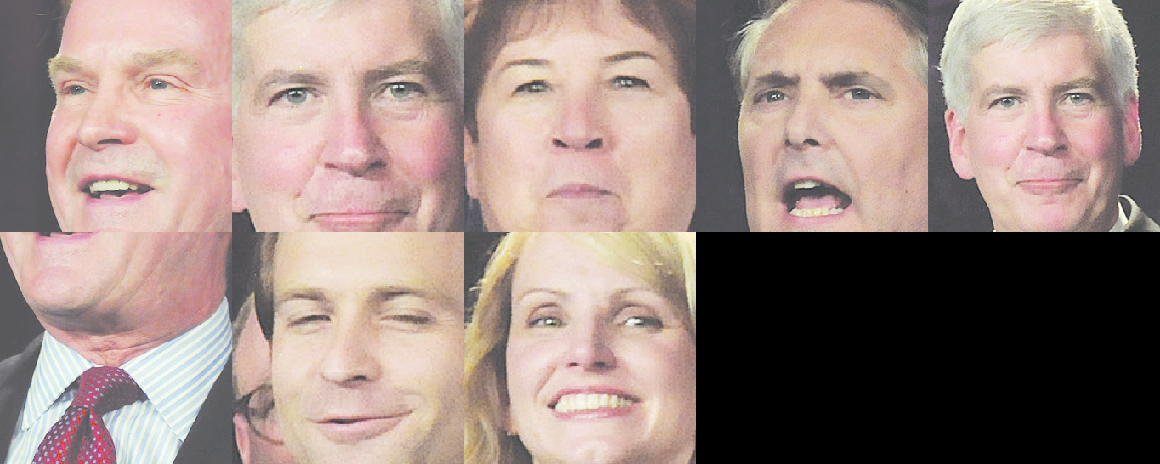

Results found in file a-3.png


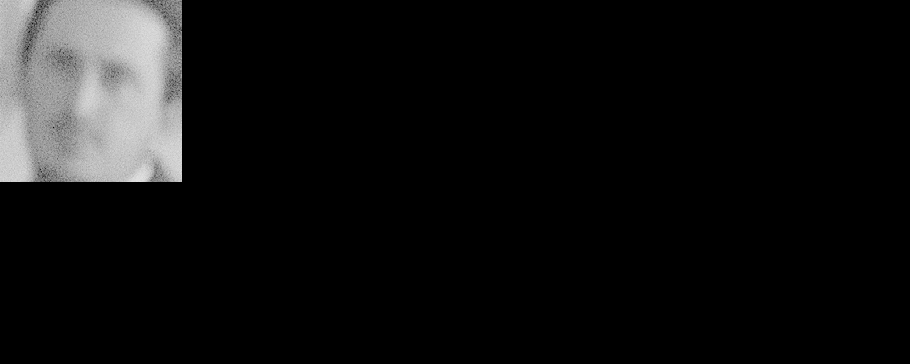

In [0]:
for png in small_file_list:
    search_keyword('Christopher', png, scaleFactor=1.5)

Results found in file a-0.png


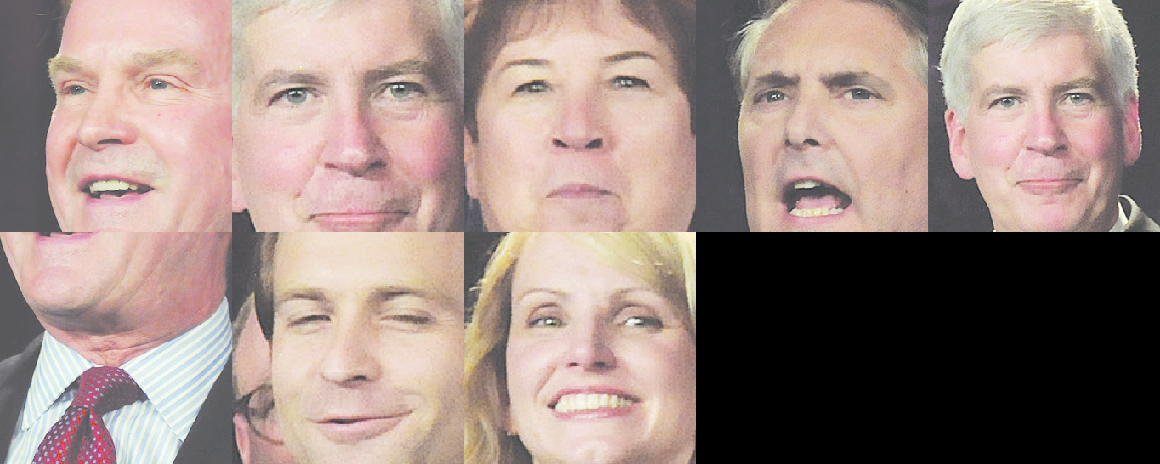

Results found in file a-1.png


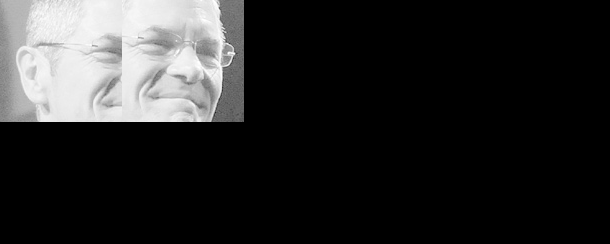


Results found in file a-10.png
But there were no faces in that file!

Results found in file a-13.png
But there were no faces in that file!
Results found in file a-2.png


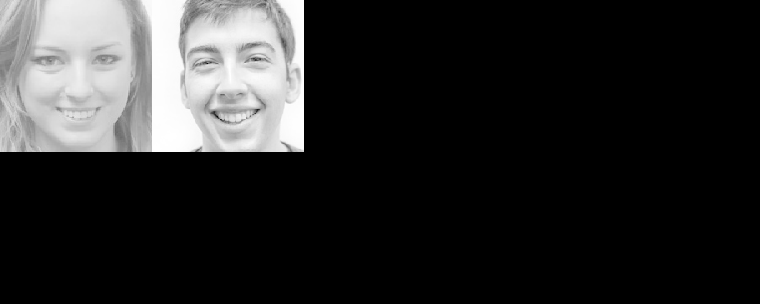

Results found in file a-3.png


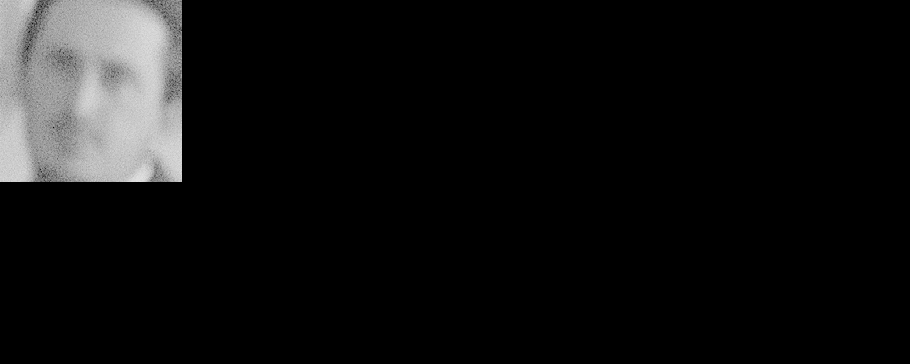

Results found in file a-8.png


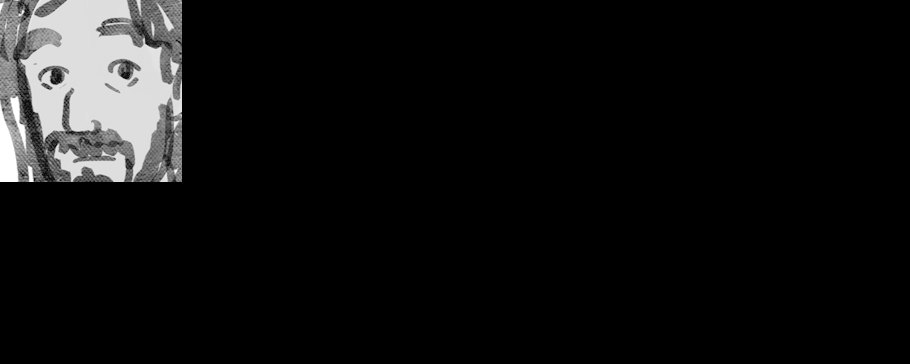

In [0]:
for png in large_file_list:
    search_keyword('Mark', png, scaleFactor=1.5)